# Capstone project 1: Housing prices advanced regression



In [1]:
#-----------------------------------------------------------------------------#
import pandas as pd
import numpy as np

#Load training data from csv files
df = pd.read_csv('train.csv', index_col=['Id']) 


## Data exploration and cleaning

In [2]:
#get overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [3]:
#fill NA with 0
from pandas.api.types import is_string_dtype

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=df[col].fillna('0') #fill na with 0
    else:
        df[col]=df[col].fillna(0)

In [4]:
#change the year to age
for col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[col] = df['YrSold'] - df[col]
#change SalePrice to fold of 1k
df['SalePrice'] = df.SalePrice / 1000

In [9]:
#create one more column to combine 1st floor square feet with 2nd floor, totalSF
df['totalSF'] = df['1stFlrSF'] + df['2ndFlrSF']

In [10]:
#Drop duplicates
df = df.drop_duplicates()
df.shape     

(1460, 81)

In [11]:
#explore data range
df['YrSold'].min(),df['YrSold'].max()

(2006, 2010)

### Data visualization for Story Telling

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not Id
4          red
12         red
18         red
21         red
29         red
36         red
41         red
45         red
52      orange
54         red
58         red
59         red
61         red
70         red
82      orange
86         red
91         red
92         red
97         red
111        red
120        red
121        red
126     orange
129        red
130        red
131        red
135        red
138        red
142        red
145     orange
         ...  
1307       red
1319       red
1330       red
1332       red
1334    orange
1338    orange
1339       red
1340       red
1347       red
1356       red
1360       red
1365     green
1368    orange
1373       red
1379    orange
1383    orange
1387       red
1391       red
1393       red
1395       red
1403       red
1405       red
1420       red
1421       red
1424       red
1431       red
1435       red
1450    orange
1453    orange
1454       red
Name: MSZoning, Length: 314, dtype: object.

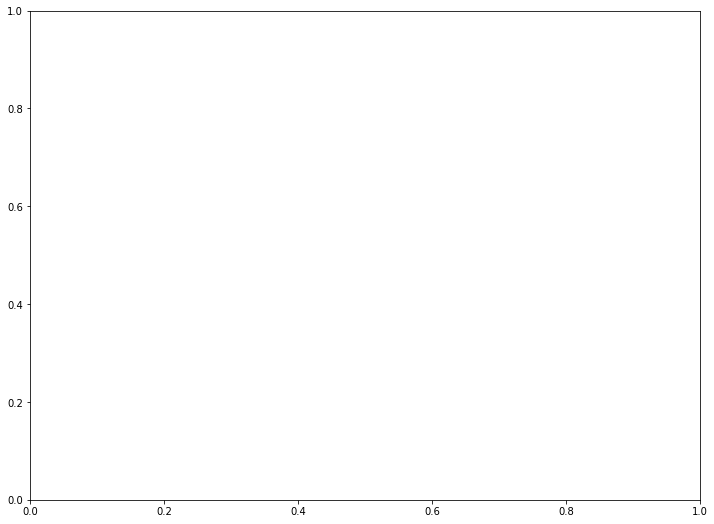

In [51]:
# Question1: selling price change during years

import matplotlib.pyplot as plt
import seaborn as sns

def plotyear(year):
    data = df[df.YrSold == year]
    size = data.BedroomAbvGr*30
    color = data.MSZoning.map({'RL':'red','RM':'orange','FV':'green','C(all)':'coral','RH':'blue'})
    
    data.plot.scatter('totalSF','SalePrice',
                     s=size,c=color,
                     linewidths=1,edgecolors='k',
                     figsize=(12,9))
    plt.xlabel('total squre feet')
    plt.ylabel('SalePrice')
    plt.title(year,fontsize=20)
    
plotyear(2006)

In [28]:
data = df.loc[df.YrSold == 2006]
data.MSZoning.unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

In [48]:
# Question2: What neighborhood is most desirable


Id
1        90
2        90
3        90
4        90
5       120
6        30
7        90
8        90
9        60
10       60
11       90
12      120
13       60
14       90
15       60
16       60
17       60
18       60
19       90
20       90
21      120
22       90
23       90
24       90
25       90
26       90
27       90
28       90
29       60
30       30
       ... 
1431    120
1432     60
1433    120
1434     90
1435     90
1436     90
1437     90
1438     60
1439     60
1440     90
1441     90
1442     30
1443     90
1444     60
1445     90
1446     90
1447     90
1448     90
1449     60
1450     30
1451    120
1452     90
1453     60
1454     90
1455     60
1456     90
1457     90
1458    120
1459     60
1460     90
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [43]:
color = data['MSZoning'].map({'RL':'red','RM':'orange','FV':'green','C(all)':'coral','RH':'blue'})
color.values

array(['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'orange',
       'red', 'red', 'red', 'red', 'red', 'orange', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'orange', 'red', 'red', 'red', 'red',
       'red', 'red', 'orange', 'orange', 'orange', 'red', 'orange', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange',
       'red', 'red', 'red', 'red', 'orange', 'red', 'red', 'red',
       'orange', 'orange', 'red', 'orange', 'red', 'red', 'red', 'red',
       'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'orange', 'orange', 'red', 'orange', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'green', 'red', 'red', 'red', 'red', 'red', 'red',
       'orange', 'red', 'orange', 'orange', 'red', 'red', 'orange', 'red',
       'red', 'orange', 'red', 'red', 'red', 'red', 'red', 'red',
       'orange', 'green', 'red', 'red', 'red', 'red', 'orange', 'red',

## Modeling
### First Regression

In [7]:
#Preprocessing
#drop some columns that looks irrelevent to SalePrice according to correlation_plot
drop_1 = ['GarageYrBlt','MoSold','YrSold']

In [8]:
""" 
drop some columns that has no diverse infromation according to distribution_plot
e.g. only one column with high value, and the others don't have enough data count
""" 

drop_2 = ['Street','Alley','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF',\
          'GarageCond','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',\
          'PoolQC','MiscFeature','MiscVal']

In [9]:
drops = drop_1 + drop_2
df1 = df.drop(drops,axis=1)
df1.shape

(1460, 61)

In [10]:
#usig Label Encoder to deal with categorial data
from sklearn.preprocessing import LabelEncoder

X_train,y_train = df1.iloc[:,:-1],df1.iloc[:,-1]
le_train = LabelEncoder()

X_train = X_train.apply(lambda x: le_train.fit_transform(x))
X_train.shape

(1460, 60)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# dummy data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_mask = (X_train.dtypes == 'object')
#categorical_columns = X.columns[categorical_mask].to_list()

ohe_train = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
X_train = ohe_train.fit_transform(X_train)

X_train.shape

(1460, 60)

In [13]:
%%time
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(50,300,50),
    'subsample':np.arange(0.05,1,0.05)
}
model = xgb.XGBRegressor(max_depth=8,objective='reg:squarederror')
random_search_mse = RandomizedSearchCV(estimator=model,
                                       param_distributions=search_grid,
                                       scoring='neg_mean_squared_error',
                                       cv=4,
                                       n_iter=10,
                                       verbose=1)
random_search_mse.fit(X_train,y_train)
print('Best score: ', random_search_mse.best_score_)
print('Bset model: ', random_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search_mse.best_score_)))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   30.0s finished


Best score:  -700.834517817059
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6500000000000001, verbosity=1)
Best_RMSE:  26.47327931739963
CPU times: user 30.9 s, sys: 95.8 ms, total: 31 s
Wall time: 31.1 s


In [14]:
from sklearn.metrics import r2_score
y_train_predict = random_search_mse.best_estimator_.predict(X_train)
r2_score(y_train,y_train_predict)

0.9991056343458342

In [15]:
search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'subsample':np.arange(0.05,1,0.05),
    'max_depth':np.arange(3,10,1)
}
model = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror')

random_search_r2 = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search_r2.fit(X_train,y_train)
print('Best score: ', random_search_r2.best_score_)
print('Bset model: ', random_search_r2.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   35.7s finished


Best score:  0.8913974143772784
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7000000000000001, verbosity=1)


In [16]:
y_train_predict_2 = random_search_r2.best_estimator_.predict(X_train)
r2_score(y_train,y_train_predict_2)

0.9955866293548614

In [17]:
features = ['f'+str(x) for x in range(0,60)]
feature_dict = dict(zip(features,df1.columns))
feature_dict

{'f0': 'MSSubClass',
 'f1': 'MSZoning',
 'f2': 'LotFrontage',
 'f3': 'LotArea',
 'f4': 'LotShape',
 'f5': 'LandContour',
 'f6': 'LotConfig',
 'f7': 'LandSlope',
 'f8': 'Neighborhood',
 'f9': 'Condition1',
 'f10': 'BldgType',
 'f11': 'HouseStyle',
 'f12': 'OverallQual',
 'f13': 'OverallCond',
 'f14': 'YearBuilt',
 'f15': 'YearRemodAdd',
 'f16': 'RoofStyle',
 'f17': 'Exterior1st',
 'f18': 'Exterior2nd',
 'f19': 'MasVnrType',
 'f20': 'MasVnrArea',
 'f21': 'ExterQual',
 'f22': 'ExterCond',
 'f23': 'Foundation',
 'f24': 'BsmtQual',
 'f25': 'BsmtCond',
 'f26': 'BsmtExposure',
 'f27': 'BsmtFinType1',
 'f28': 'BsmtFinSF1',
 'f29': 'BsmtFinType2',
 'f30': 'BsmtFinSF2',
 'f31': 'BsmtUnfSF',
 'f32': 'TotalBsmtSF',
 'f33': 'HeatingQC',
 'f34': 'CentralAir',
 'f35': 'Electrical',
 'f36': '1stFlrSF',
 'f37': '2ndFlrSF',
 'f38': 'GrLivArea',
 'f39': 'BsmtFullBath',
 'f40': 'BsmtHalfBath',
 'f41': 'FullBath',
 'f42': 'HalfBath',
 'f43': 'BedroomAbvGr',
 'f44': 'KitchenAbvGr',
 'f45': 'KitchenQual',
 '

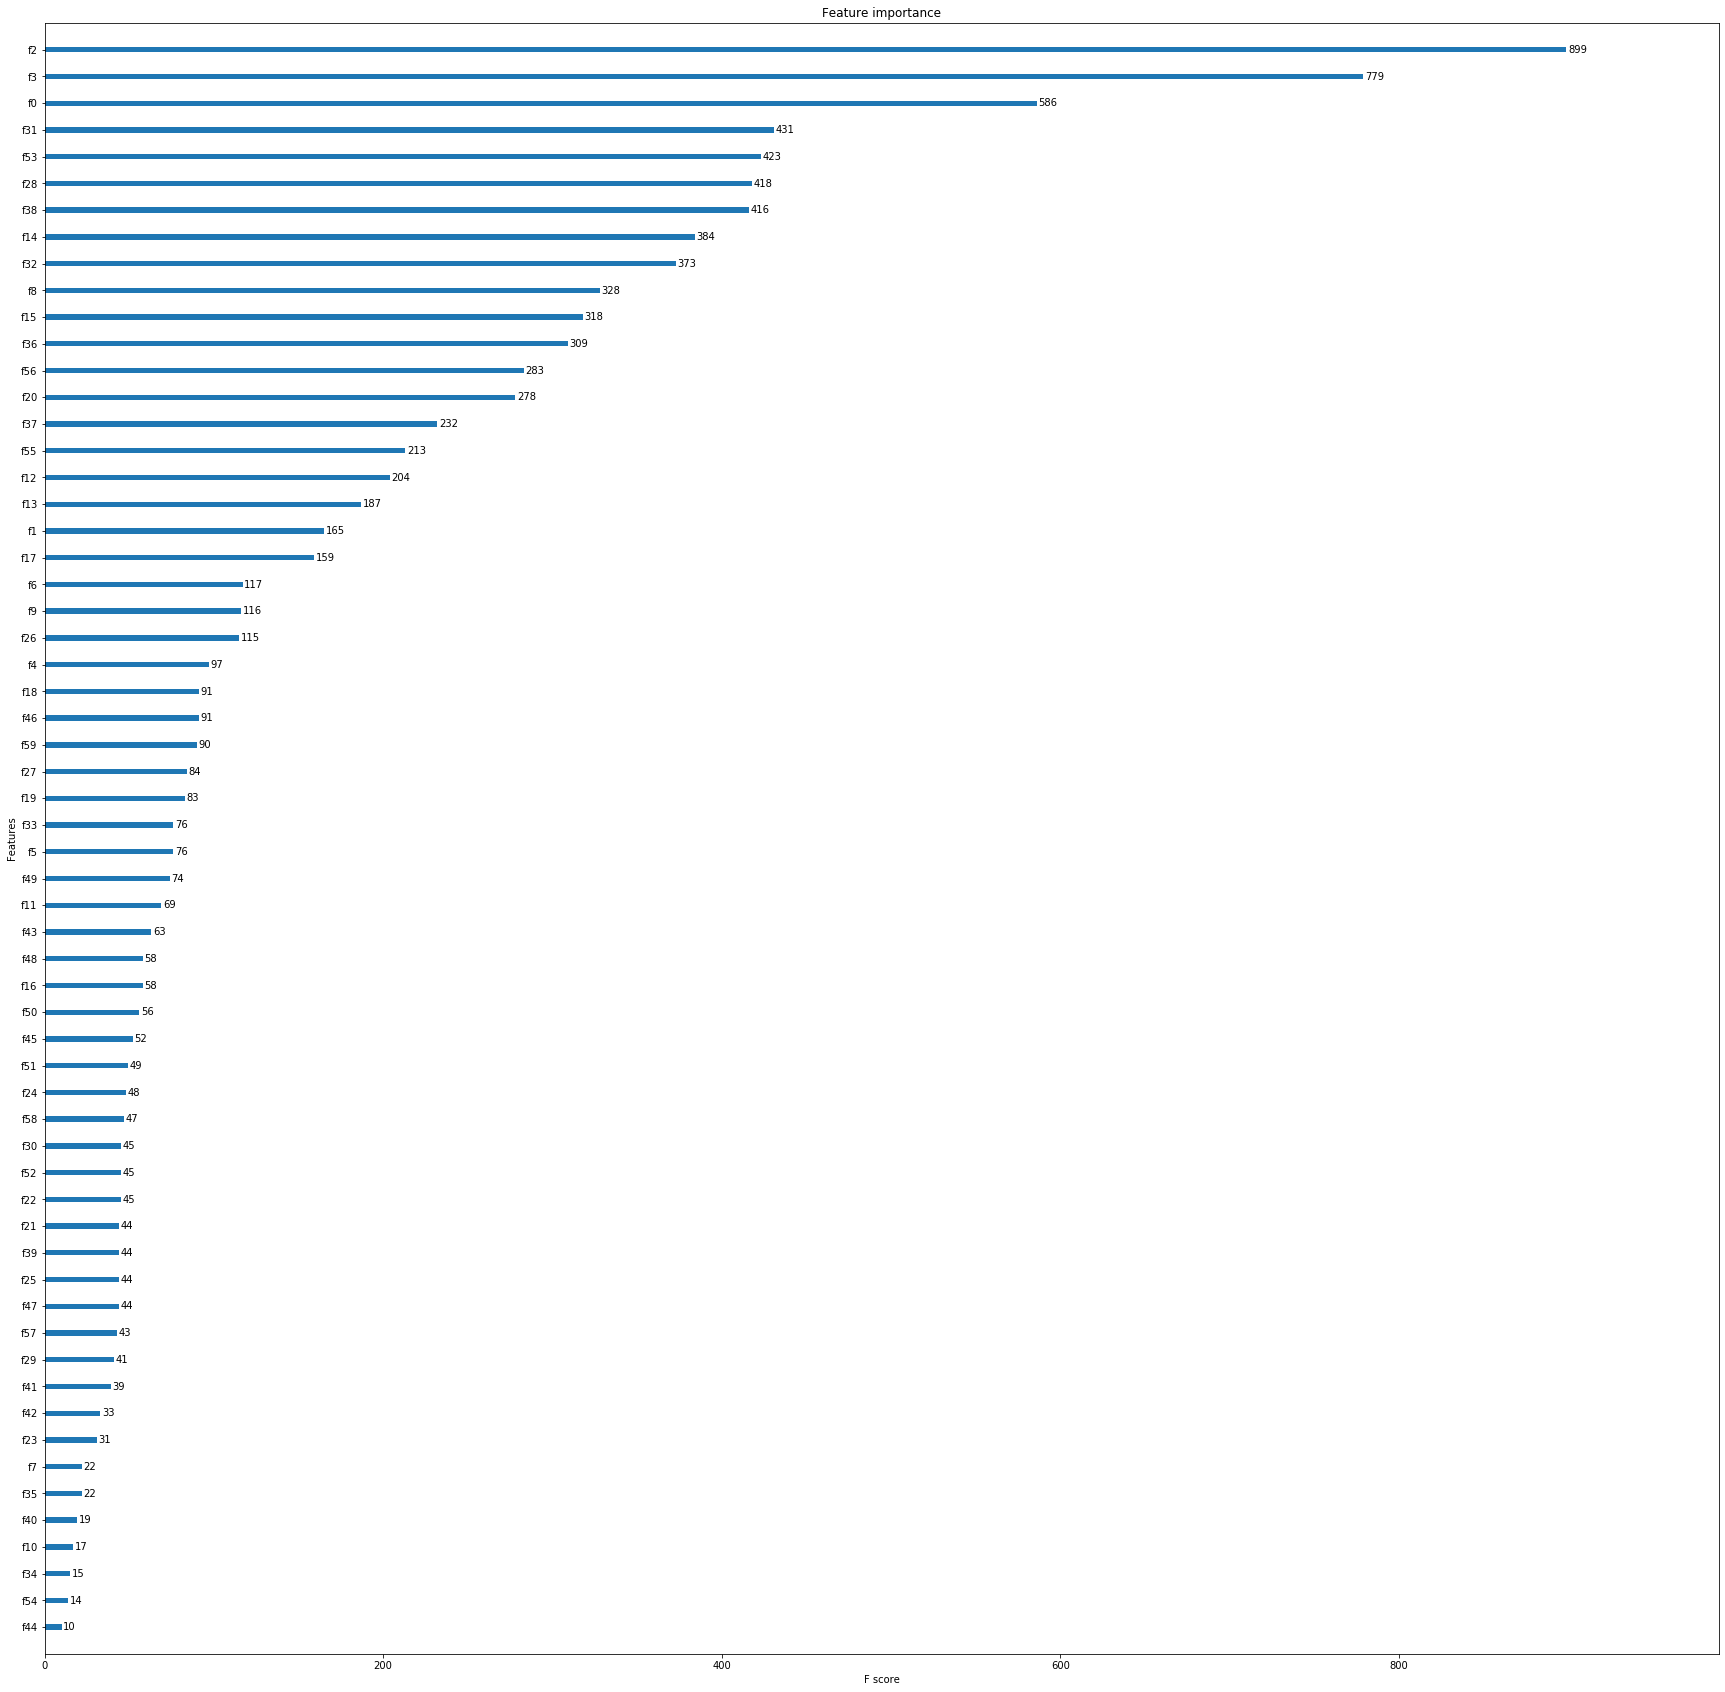

In [18]:
# plot importance 
from xgboost import plot_importance
fig3, ax3 = plt.subplots(1,1,figsize=(30,30))

plot_importance(random_search_mse.best_estimator_,ax=ax3,grid=False)
plt.show()

### Predict Testing data


In [25]:
#Load test data
df_test = pd.read_csv('test.csv', index_col=['Id']) 
df.shape,df_test.shape

((1460, 80), (1459, 79))

In [26]:
#Fill NA
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        df_test[col]=df_test[col].fillna('0') #fill na with 0
    else:
        df_test[col]=df_test[col].fillna(0)
df_test.shape

(1459, 79)

In [27]:
#Drop duplicates
df_test = df_test.drop_duplicates()
df_test.shape    

(1459, 79)

In [28]:
#Drop unnecessary columns
df_test = df_test.drop(drops,axis=1)
df_test.shape

(1459, 60)

In [29]:
#convert catergorical data using LabelEncoder and OneHotEncoder

le_test = LabelEncoder()
ohe_test = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

X_test = df_test.apply(lambda x: le_test.fit_transform(x))
X_test = ohe_test.fit_transform(X_test)

In [30]:
X_test.shape

(1459, 60)

In [31]:
#predict using random_search_r2 best model
y_predict_1 = random_search_r2.best_estimator_.predict(X_test)

In [32]:
#predict using random_search_mse best model
y_predict_2 = random_search_mse.best_estimator_.predict(X_test)

In [33]:
#Two predicts is very similar
r2_score(y_predict_1,y_predict_2)

0.928001594622394

In [34]:
#Negative control check: when compare the y value in train data with predicted y data, there is no correlation.
r2_score(y_train[0:1458],y_predict_2[0:1458])

-0.9182686888127949